# Напишите заголовок проекта здесь

- Автор:
- Дата:

### Цели и задачи проекта

<font color='#777778'>В этом блоке перечислите цель проекта и те задачи, которые вы решаете. Можно использовать описания проекта, но будет полезно, если вы сформулируете основную цель проекта самостоятельно.</font>

### Описание данных

<font color='#777778'>Здесь приведите описание данных.</font>

### Содержимое проекта

<font color='#777778'>Перечислите основные шаги проекта или напишите оглавление. Используйте описание проекта, чтобы зафиксировать основные шаги.</font>

---

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [8]:
# !pip install phik

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik
import numpy as np

In [10]:
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

- Познакомьтесь с данными и изучите общую информацию о них.

In [11]:
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [12]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [13]:
for column in info_df.columns:
    t = len(info_df[info_df[column].isna()])
    if t > 0:
        print(f"В столбце {column} есть {t} пропусков, это {round((t / info_df.shape[0])* 100, 2)}% от количества записей")

В столбце hours есть 536 пропусков, это 6.38% от количества записей
В столбце seats есть 3611 пропусков, это 42.96% от количества записей


In [14]:
info_df.describe()

,rating,chain,seats
count,8406.000000,8406.000000,4795.000000
mean,4.229895,0.381275,108.421689
std,0.470348,0.485729,122.833396
min,1.000000,0.000000,0.000000
25%,4.100000,0.000000,40.000000
50%,4.300000,0.000000,75.000000
75%,4.400000,1.000000,140.000000
max,5.000000,1.000000,1288.000000


In [15]:
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [16]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [17]:
for column in price_df.columns:
    t = len(price_df[price_df[column].isna()])
    if t > 0:
        print(f"В столбце {column} есть {t} пропусков, это {round((t / price_df.shape[0])* 100, 2)}% от количества записей")

В столбце price есть 743 пропусков, это 18.31% от количества записей
В столбце avg_bill есть 242 пропусков, это 5.96% от количества записей
В столбце middle_avg_bill есть 909 пропусков, это 22.4% от количества записей
В столбце middle_coffee_cup есть 3523 пропусков, это 86.82% от количества записей


In [18]:
price_df.describe()

,middle_avg_bill,middle_coffee_cup
count,3149.000000,535.000000
mean,958.053668,174.721495
std,1009.732845,88.951103
min,0.000000,60.000000
25%,375.000000,124.500000
50%,750.000000,169.000000
75%,1250.000000,225.000000
max,35000.000000,1568.000000


---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

  - Предоставлены 2 датафрейма с информацией о заведениях общественного питания: rest_info (8406 строк и 9 столбцов) - информация относительно назавния, категории, адреса, рейтинга и прочее; rest_price (4058 строк и 5 столбцов) - информация о ценовой политике заведения
  - В датафрейме rest_info можно исправить тип данных seats с float на int и снизить тип данных int64 до int8 в столбце chain для улучшения производительности; в датафрейме также существует 2 столбца в котором есть пустые значения - это hours (6.4% пустых) и seats (43% пустых). Можно предположить, что большое количество пропусков в seats объясняется работой заведения "навынос" и не предусматривает посадочные места.
  - В датафрейме rest_price нет проблем с типами данных, однако существуют проблемы с пропусками: столбцы price (18.3% пропусков), avg_bill (6% пустых), middle_avg_bill (22.4% пустых), middle_coffee_cup (86.8% пустых) имеют пропуски.

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [19]:
df = info_df.merge(price_df, how='left', on='id')
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [21]:
# Снижаем int64 до int8 в столбце chain
df['chain']  = pd.to_numeric(df['chain'], downcast='integer')

In [22]:
# Смотрим, что у строк с seats == NaN нет какой-то явной зависимости
df[df['seats'].isna()].head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN,средние,NaN,NaN,NaN
11,53ac103717c142f29907080db1f0ce58,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",4.9,0,NaN,NaN,NaN,NaN,NaN
12,9384a51a4b2749759234df689b3a4857,Заправка,кафе,"Москва, МКАД, 80-й километр, 1",Северный административный округ,вт-сб 09:00–18:00,4.3,0,NaN,средние,Средний счёт:330 ₽,330.0,NaN


In [23]:
# Пока что пропуски не мешают, поэтому это пока не делаем

# # Меняем NaN в столбце seats на -1
# df['seats'] = df['seats'].fillna(-1)

# # Меняем float на int в столбце seats
# df['seats'] = df['seats'].astype('int')

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

- Пока что пропуски не мешают, поэтому не трогаем

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [24]:
# Приводим столбцы типа object к нижнему регистру и удаляем лишние пробелы
for column in ['name', 'category', 'address', 'district', 'hours', 'price', 'avg_bill']:
    df[column] = df[column].str.lower().str.strip()

In [25]:
# смотрим есть ли проблемы с дублированием в категориальных столбцах
for i in ['category', 'district', 'price']:
    print(df[i].unique())
    print()

['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']

['северный административный округ'
 'северо-восточный административный округ'
 'северо-западный административный округ'
 'западный административный округ' 'центральный административный округ'
 'восточный административный округ' 'юго-восточный административный округ'
 'южный административный округ' 'юго-западный административный округ']

[nan 'выше среднего' 'средние' 'высокие' 'низкие']



In [26]:
# Проверяем полные дубликаты
df.duplicated().sum()

0

In [27]:
# Проверяем дубликаты по столбцу id
df.duplicated(subset='id').sum()

0

In [28]:
# Считаем, что записи с одинаковыми названием и адресом это задвоения в данных, а потому удаляем их
print("Количество строк с одинаковым названием и адресом:", df.duplicated(subset=['name', 'address']).sum())

df = df.drop_duplicates(subset=['name', 'address'], keep='first', inplace=False)

Количество строк с одинаковым названием и адресом: 4


- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [29]:
def create_is_24_7(row):
    """
    Функция для заполнения нового столбца is_24_7
    """
    if isinstance(row, float):
#         return np.nan
        return -1
    elif 'круглосуточно' in row and 'ежедневно' in row:
        return True
    else:
        return False

In [30]:
df['is_24_7'] = df['hours'].apply(create_is_24_7) 

In [31]:
print(f"Количество заведений, работающих ежедневно и круглосуточно: {df['is_24_7'].sum()}")

Количество заведений, работающих ежедневно и круглосуточно: 195


---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

  - Все строки столбцов типа object были приведены к нижнему регистру, также были удалены излишние пролбелы.
  - Пустые строки не мешают дальнейшему анализу, поэтому были оставлены как есть.
  - Явных дубликатов и задвоений в id найдено не было, однако, были найдены записи с одинаковыми названиями и одинаковыми адресами, такие записи расценили как дубликаты и удалили, всего таких записей было 4.
  - Был создан новый столбец "is_24_7" типа bool, который отображает True если заведение работает круглосуточно, False если нет и пустая строка, если график работы заведения неизвестен. Было найдено 730 заведений работающих круглосуточно.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [32]:
df['category'].value_counts()

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

<AxesSubplot:title={'center':'Количество заведений каждой категории'}>

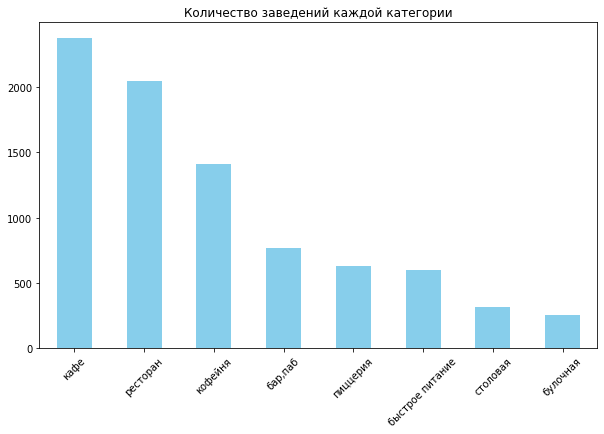

In [33]:
df['category'].value_counts().plot(
    kind='bar',
    title='Количество заведений каждой категории',
    figsize=(10, 6),
    rot=45,
    color='skyblue'
)

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [34]:
# Сокращаем 'административный округ' до 'ао' чтобы все на график помещалось
df['district'] = df['district'].str.replace('административный округ', 'ао')

In [35]:
df['district'].value_counts()

центральный ао         2242
северный ао             898
южный ао                892
северо-восточный ао     890
западный ао             850
восточный ао            798
юго-восточный ао        714
юго-западный ао         709
северо-западный ао      409
Name: district, dtype: int64

<AxesSubplot:title={'center':'Количество заведений по административным округам'}>

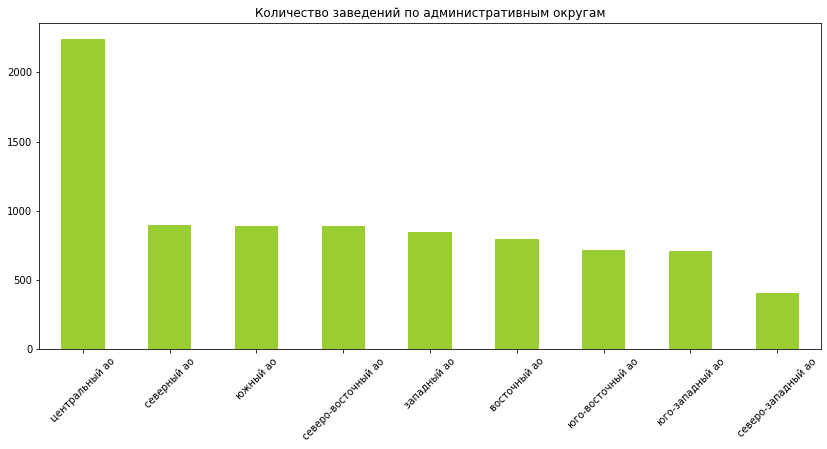

In [36]:
df['district'].value_counts().plot(
    kind='bar',
    figsize=(14, 6),
    rot=45,
    color='yellowgreen',
    title='Количество заведений по административным округам'
)

In [37]:
cao_df = df[df['district']=='центральный ао'].groupby('category')['category'].count()
cao_df

category
бар,паб            364
булочная            50
быстрое питание     87
кафе               464
кофейня            428
пиццерия           113
ресторан           670
столовая            66
Name: category, dtype: int64

<AxesSubplot:title={'center':'Распределние категорий заведений общепита в ЦАО'}>

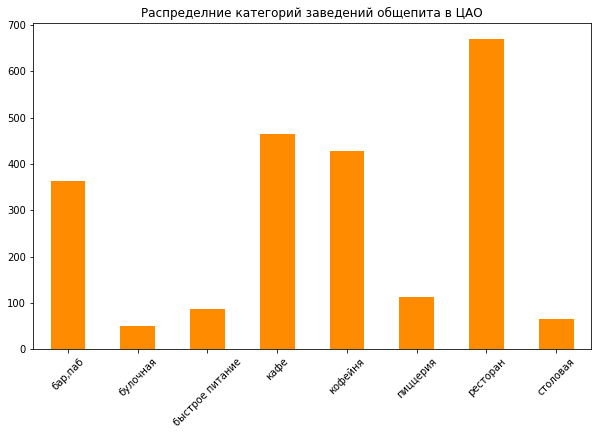

In [38]:
cao_df.plot(
    kind='bar',
    figsize=(10, 6),
    rot=45,
    xlabel='',
    title='Распределние категорий заведений общепита в ЦАО',
    color='darkorange'
)

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

<AxesSubplot:title={'center':'Количество сетевых и несетевых заведений'}, xlabel='Сетевое заведение'>

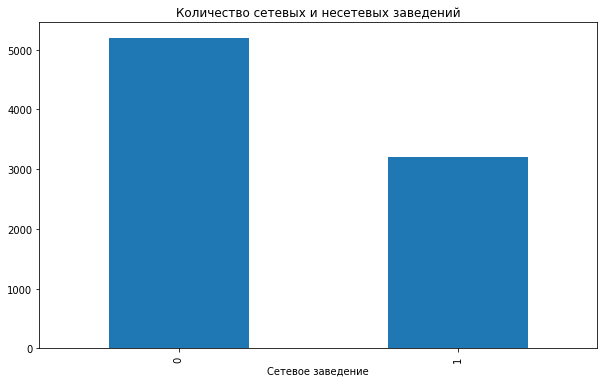

In [39]:
df['chain'].value_counts().plot(
    kind='bar',
    title='Количество сетевых и несетевых заведений',
    figsize=(10, 6),
    xlabel='Сетевое заведение'
)

In [40]:
df.groupby(['chain', 'category'])['category'].count()

chain  category       
0      бар,паб             596
       булочная             99
       быстрое питание     371
       кафе               1597
       кофейня             693
       пиццерия            303
       ресторан           1313
       столовая            227
1      бар,паб             168
       булочная            157
       быстрое питание     232
       кафе                779
       кофейня             720
       пиццерия            330
       ресторан            729
       столовая             88
Name: category, dtype: int64

<AxesSubplot:title={'center':'Сетевые и несетевые заведения по категориям'}, xlabel='Сетевое заведение'>

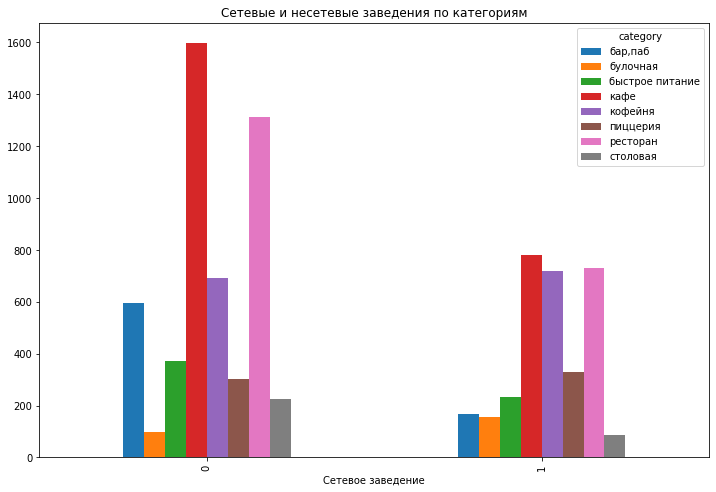

In [41]:
df_unstack = df.groupby(['chain'])['category'].value_counts().unstack(fill_value=0)

df_unstack.plot(kind='bar',
                figsize=(12, 8),
                title='Сетевые и несетевые заведения по категориям',
                xlabel='Сетевое заведение'
               )



---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


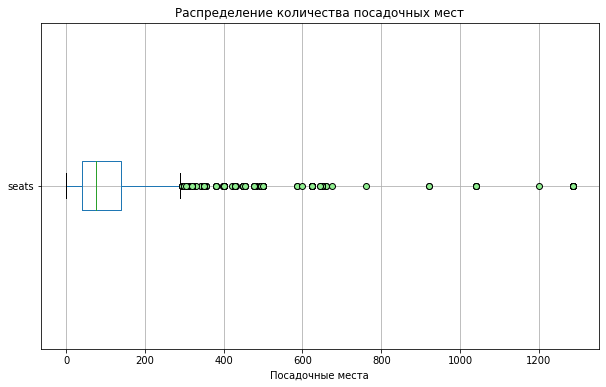

In [42]:
boxplot = df.boxplot(
    column = 'seats',
    figsize = (10, 6),
    vert=False,
    flierprops = dict(markerfacecolor='lightgreen', marker='o')
)

boxplot.set_title('Распределение количества посадочных мест')
boxplot.set_xlabel('Посадочные места')

plt.show()

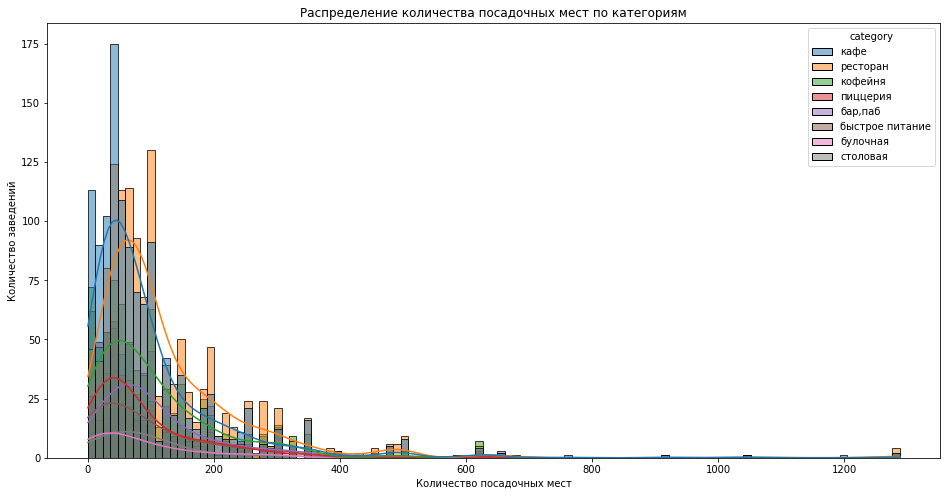

In [43]:
# Распределение количества посадочных мест для каждой категории (на одном графике)
plt.figure(figsize=(16, 8))
sns.histplot(data=df, x='seats', hue='category', kde=True)
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')
plt.title('Распределение количества посадочных мест по категориям')
plt.show()

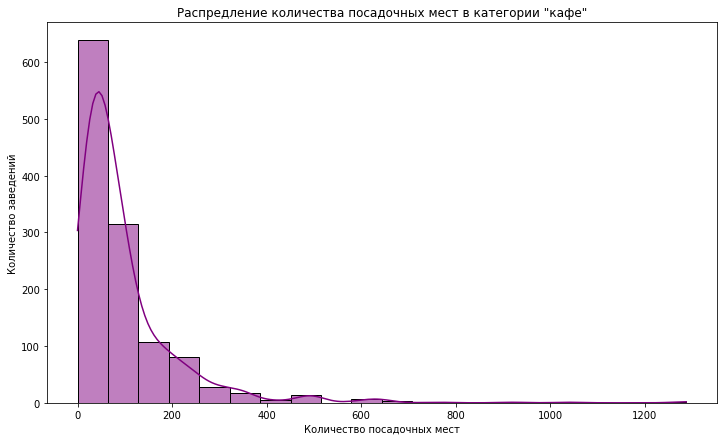

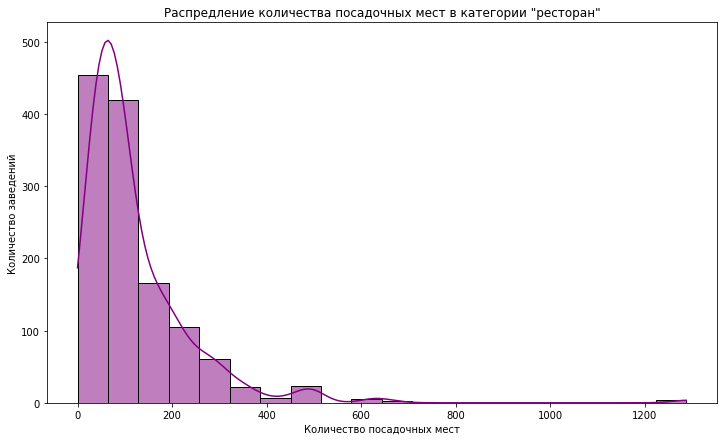

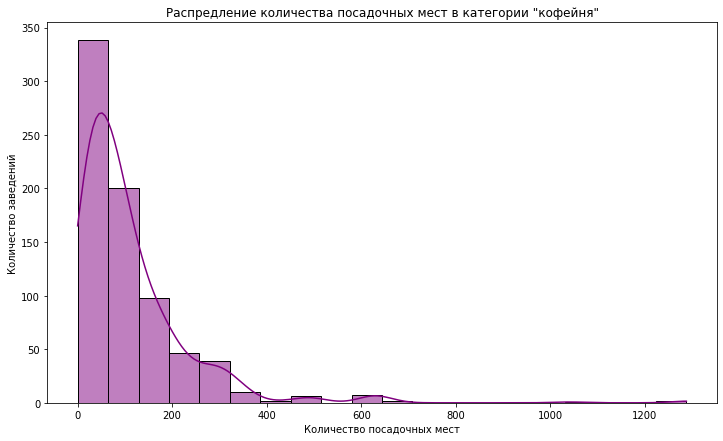

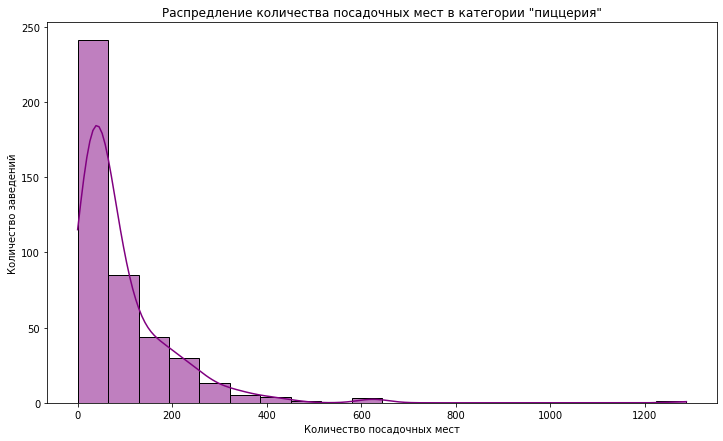

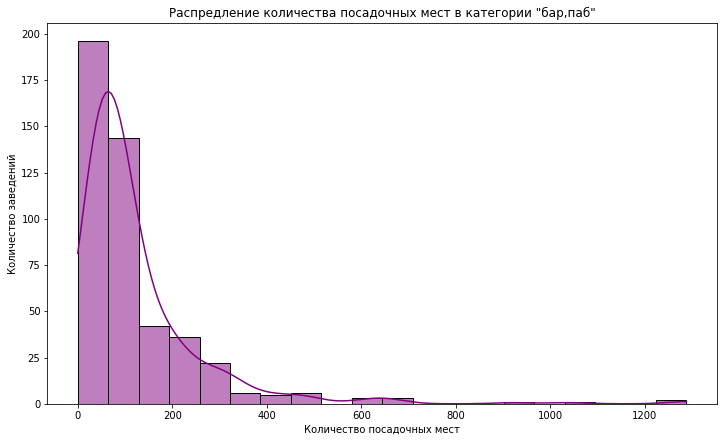

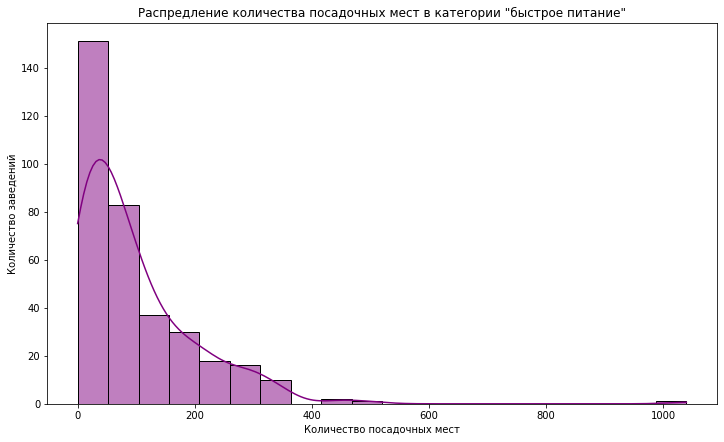

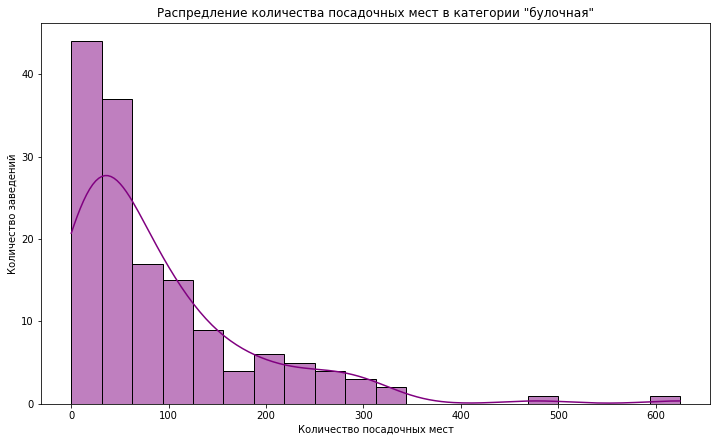

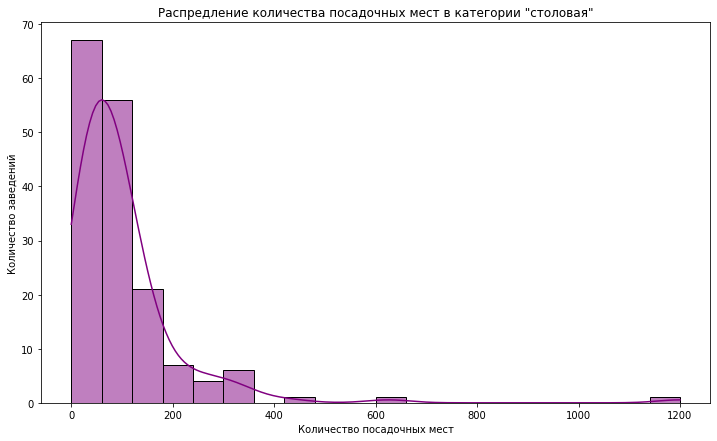

In [44]:
# Распределение количества посадочных мест для каждой категории (Все графики отдельно)
for category in df['category'].unique():
    plt.figure(figsize=(12, 7))
    t_df = df[df['category'] == category]
    sns.histplot(data=t_df, x='seats', kde=True, color='purple', bins=20)
    plt.title(f'Распредление количества посадочных мест в категории "{category}"')
    plt.xlabel('Количество посадочных мест')
    plt.ylabel('Количество заведений')
    plt.show()

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

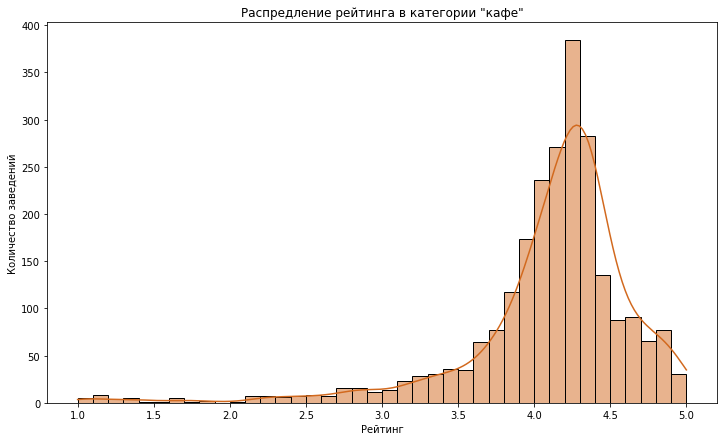

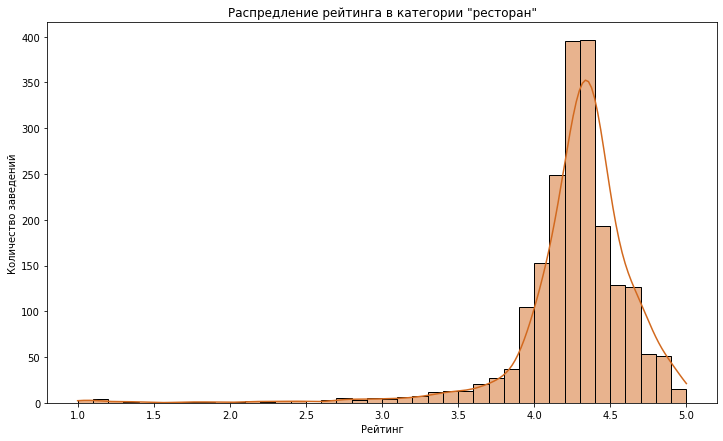

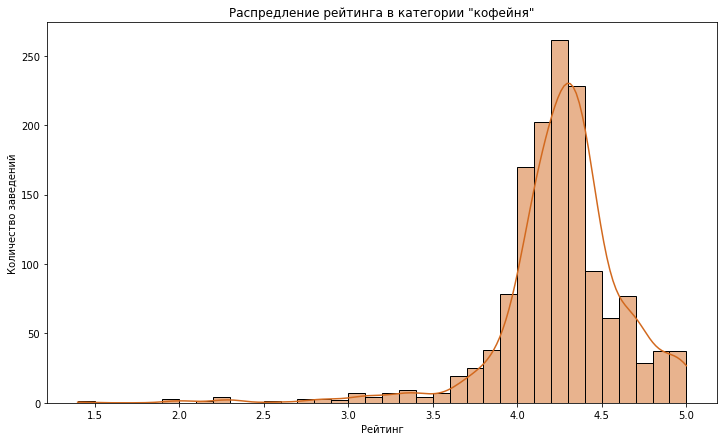

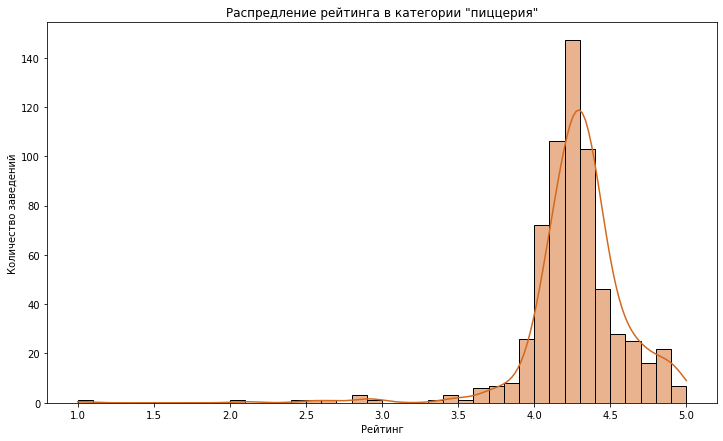

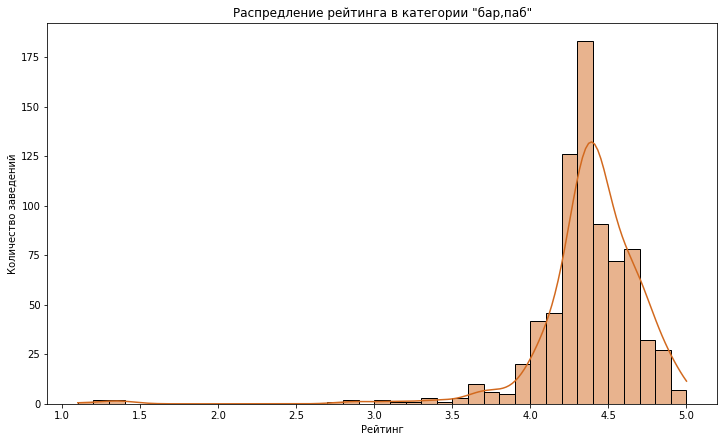

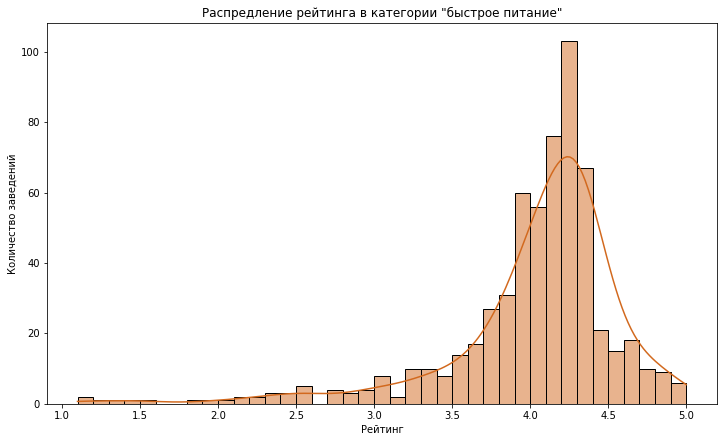

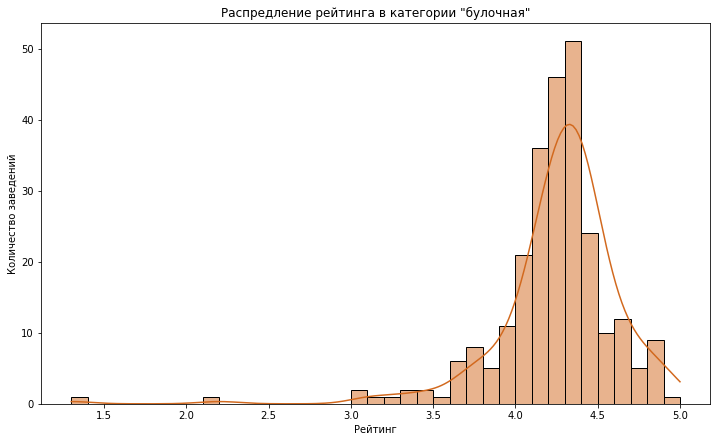

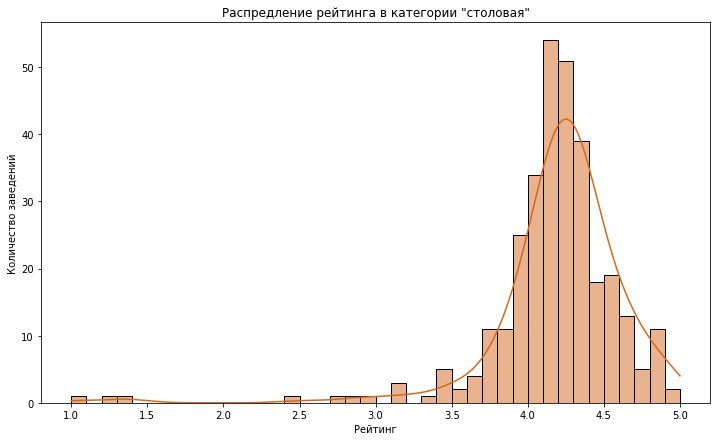

In [45]:
# Распределение рейтинга заведения для каждой категории
for category in df['category'].unique():
    plt.figure(figsize=(12, 7))
    t_df = df[df['category'] == category]
    sns.histplot(data=t_df, x='rating', kde=True, color='chocolate', binwidth=0.1)
    plt.title(f'Распредление рейтинга в категории "{category}"')
    plt.xlabel('Рейтинг')
    plt.ylabel('Количество заведений')
    plt.show()

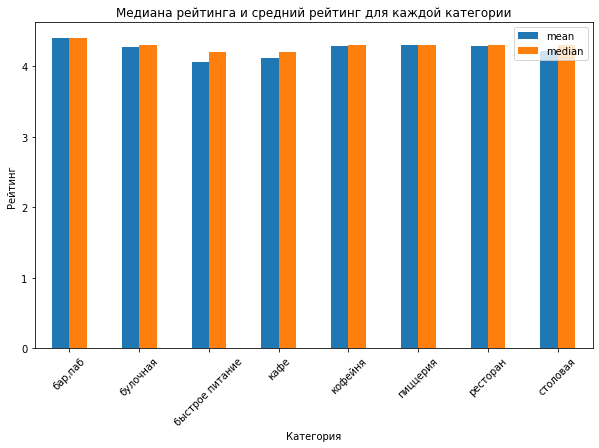

In [46]:
# Среднее
mean_df = df.groupby('category')['rating'].mean().reset_index()
mean_df['rating'] = round(mean_df['rating'], 2)
mean_df = mean_df.rename(columns={'rating': 'mean'})

# Медиана
median_df = df.groupby('category')['rating'].median().reset_index()
median_df['rating'] = round(median_df['rating'], 2)
median_df = median_df.rename(columns={'rating': 'median'})

# Объединение медианы и среднего в один датафрейм
for_graph = mean_df.merge(median_df, on='category')

# Столбчатая диаграмма
for_graph.plot(
    kind='bar',
    x='category',
    y=['mean', 'median'],
    figsize=(10, 6),
    title='Медиана рейтинга и средний рейтинг для каждой категории',
    rot=45,
    xlabel='Категория',
    ylabel='Рейтинг'
)

plt.show()

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

interval columns not set, guessing: ['rating', 'chain', 'seats', 'middle_avg_bill', 'middle_coffee_cup']


<AxesSubplot:>

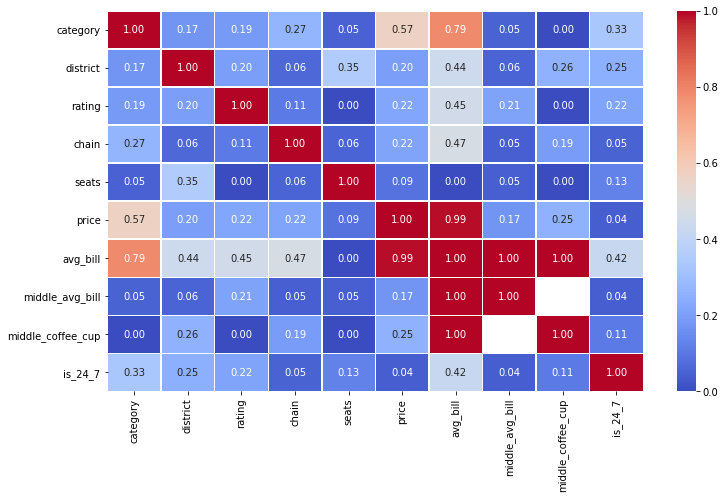

In [81]:
# Столбцы по которым ищем корреляцию
c_df = df[['category', 'district', 'rating', 'chain', 'seats', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup', 'is_24_7']]

new_df = c_df.phik_matrix()

plt.figure(figsize=(12, 7))
sns.heatmap(data=new_df, annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm')

In [78]:
# Проверяем почему не считается корреляция между middle_coffee_cup и middle_avg_bill
check_df = df[['middle_coffee_cup', 'middle_avg_bill']]

check_df[(~check_df['middle_coffee_cup'].isna()) & (~check_df['middle_avg_bill'].isna())]

,middle_coffee_cup,middle_avg_bill


Из условий задания знаем, что значения middle_coffee_cup либо и middle_avg_bill заполняются на основе данных avg_bill таким образом, что либо заполнен middle_coffee_cup, либо middle_avg_bill. Потому пересечений между столбцами нет и корреляция не считается.

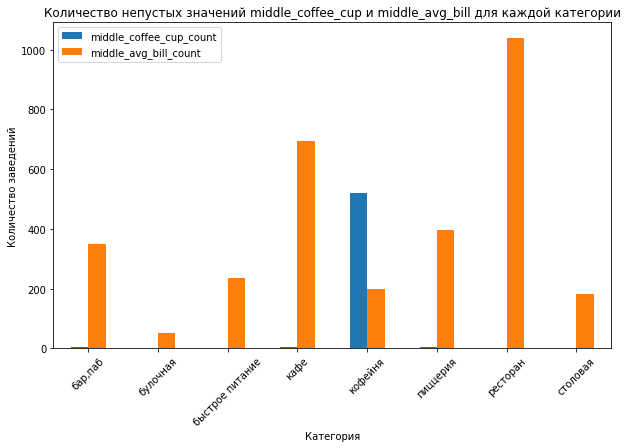

In [116]:
# Смотрим для каких категорий заполняется middle_coffee_cup, а для каких middle_avg_bill

t_df = df.groupby('category').agg(
    middle_coffee_cup_count=('middle_coffee_cup', 'count'),
    middle_avg_bill_count=('middle_avg_bill', 'count')
).reset_index()

t_df.plot(
    kind='bar',
    x='category',
    y=['middle_coffee_cup_count', 'middle_avg_bill_count'],
    figsize=(10, 6),
    title='Количество непустых значений middle_coffee_cup и middle_avg_bill для каждой категории',
    rot=45,
    xlabel='Категория',
    ylabel='Количество заведений'
)

plt.show()

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


---


---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.